In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Link: https://www.kaggle.com/mojtaba142/hotel-booking/download

Dataset information: https://www.kaggle.com/mojtaba142/hotel-booking

In [2]:
df=pd.read_csv('hotel_booking.csv')

### Get the basic Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [5]:
df.shape

(119390, 36)

## Data Cleaning

**Check Null Values**

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df.agent.value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
304.0        1
431.0        1
278.0        1
450.0        1
114.0        1
Name: agent, Length: 333, dtype: int64

In [8]:
df.agent.fillna(-1,inplace=True)  ## New categorical value of -1 set for agent

In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

In [10]:
df.company.value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
273.0      1
415.0      1
352.0      1
253.0      1
497.0      1
Name: company, Length: 352, dtype: int64

In [11]:
df.company.fillna(-1,inplace=True)  # -1 new categorical variable set for company

In [12]:
df[df.country.isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,Transient,62.0,0,2,Check-Out,2015-07-15,Diamond Wilson,Wilson.Diamond@comcast.net,870-563-6202,************8017
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,...,Transient,0.0,0,0,Canceled,2016-02-15,Alex Lang,Lang_Alex@mail.com,479-339-8268,************4034
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,...,Transient,73.0,0,2,Canceled,2016-07-20,Tamara Olson,Tamara_O@gmail.com,926-236-0559,************9899
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,...,Transient,159.0,0,5,Canceled,2016-07-22,Amanda Harper,Amanda.H66@yahoo.com,864-257-9807,************9835
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,...,Transient,50.0,0,0,Canceled,2016-10-13,Shelley Jenkins,Jenkins_Shelley@yahoo.com,621-092-0324,************9962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,April,15,10,0,0,0,...,Transient,0.0,0,0,Canceled,2017-04-10,Robin Diaz,Diaz.Robin@yandex.com,358-814-7268,************2947
65909,City Hotel,1,0,2017,April,15,10,0,0,0,...,Transient,0.0,0,0,Canceled,2017-04-10,Teresa Duncan,TeresaDuncan@att.com,636-547-8162,************8374
65910,City Hotel,1,0,2017,April,15,10,0,0,0,...,Transient,0.0,0,0,Canceled,2017-04-10,Michael Gonzalez,Michael_Gonzalez@protonmail.com,472-826-7082,************2498
80830,City Hotel,0,4,2015,November,48,23,1,2,1,...,Transient-Party,70.0,0,0,Check-Out,2015-11-26,Alice Campbell,Alice.C@gmail.com,795-315-2254,************2426


In [13]:
df.country.fillna('MIS',inplace=True)

In [14]:
df.children.fillna(0,inplace=True)

In [15]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [16]:
df.drop(columns=['name','email','phone-number','credit_card'],inplace=True)

In [17]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,-1.0,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,-1.0,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,-1.0,-1.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,-1.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,-1.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Data Analysis

### Hotels vs is_canceled

Check to see if there are issues with Cancelled and reservation status

In [18]:
df[(df.is_canceled==1) & (df.reservation_status=='Check-Out')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [19]:
df[(df.is_canceled==0) & (df.reservation_status!='Check-Out')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


Cancellation records are fine

In [20]:
df.is_canceled.value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

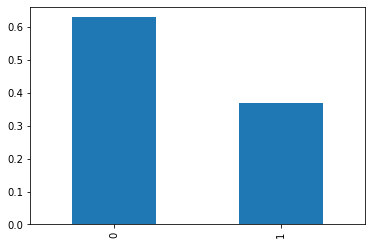

In [21]:
df.is_canceled.value_counts(normalize=True).plot.bar()
plt.show()

In [22]:
df.hotel.value_counts(normalize=True)*100

City Hotel      66.446101
Resort Hotel    33.553899
Name: hotel, dtype: float64

In [23]:
df.groupby('hotel')['is_canceled'].value_counts(normalize=True)*100

hotel         is_canceled
City Hotel    0              58.273037
              1              41.726963
Resort Hotel  0              72.236645
              1              27.763355
Name: is_canceled, dtype: float64

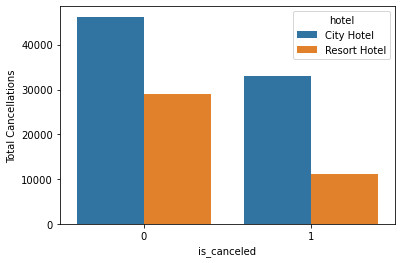

In [24]:
var=df.groupby('hotel')['is_canceled'].value_counts().rename('Total Cancellations').reset_index()
sns.barplot(data=var, x='is_canceled', y='Total Cancellations', hue='hotel')
plt.show()

#### We can see that the resorts have lower cancellation rates than the City Hotels. 

Also, we see that the city hotels are booked more than resorts

### Hotel vs Lead Time

In [25]:
df.lead_time.describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

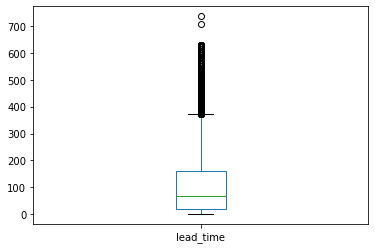

In [26]:
df.lead_time.plot.box()
plt.show()

In [27]:
df[df.lead_time>365].groupby('hotel')['is_canceled'].value_counts(normalize=True)

hotel         is_canceled
City Hotel    1              0.711169
              0              0.288831
Resort Hotel  0              0.533784
              1              0.466216
Name: is_canceled, dtype: float64

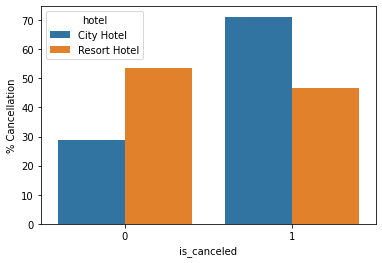

In [28]:
var=df[df.lead_time>365].groupby('hotel')['is_canceled'].value_counts(normalize=True).rename('% Cancellation').mul(100).reset_index()
sns.barplot(data=var, x='is_canceled', y='% Cancellation', hue='hotel')
plt.show()

**This shows when lead time>365:**

- The cancellations in the resorts increases almost to 45%
- In case of City Hotels the cancellations increases drastically to above 70%

In [29]:
df['lead_bins']=pd.cut(df.lead_time,[0,10,20,30,60,90,120,180,240,360,99999],labels=['<10','10-20','20-30','1-2m','2-3m','3-4m','4-6m',
                                                                    '6-8m','8-12m','>1yr'])

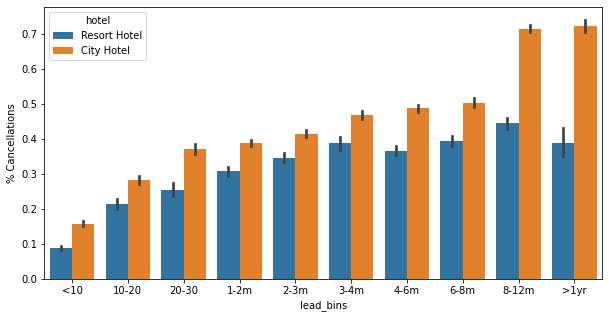

In [30]:
plt.figure(figsize=[10,5])
sns.barplot(data=df, x='lead_bins',y='is_canceled',hue='hotel')
plt.ylabel('% Cancellations')
plt.show()

- For City hotels, there is a 70% chance of cancellation when booked more than 8 months in advance
- For Resorts Cancellations are generally less than 40% overall. When the lead booking time is less than a month there is only 20% chance of cancellations

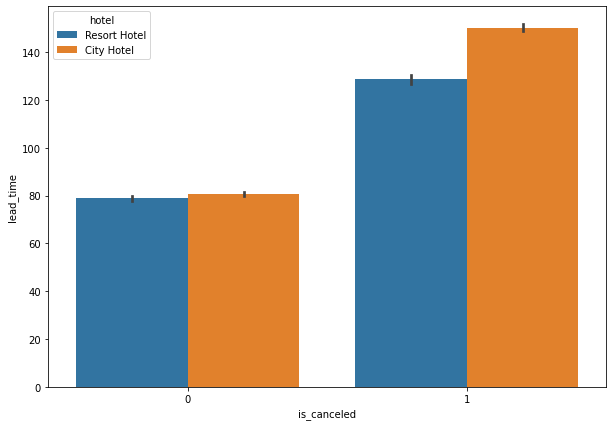

In [31]:
plt.figure(figsize=[10,7])
sns.barplot(data=df, x='is_canceled',y='lead_time',hue='hotel')
plt.show()

### Arrival Date

In [32]:
df.arrival_date_year.value_counts(normalize=True)*100

2016    47.497278
2017    34.079069
2015    18.423654
Name: arrival_date_year, dtype: float64

In [33]:
df.groupby(by=['hotel','arrival_date_year',
                                      'arrival_date_month'])['is_canceled'].value_counts()

hotel         arrival_date_year  arrival_date_month  is_canceled
City Hotel    2015               August              0              1248
                                                     1              1232
                                 December            0               986
                                                     1               668
                                 July                1               939
                                                                    ... 
Resort Hotel  2017               June                1               631
                                 March               0              1164
                                                     1               394
                                 May                 0              1212
                                                     1               545
Name: is_canceled, Length: 104, dtype: int64

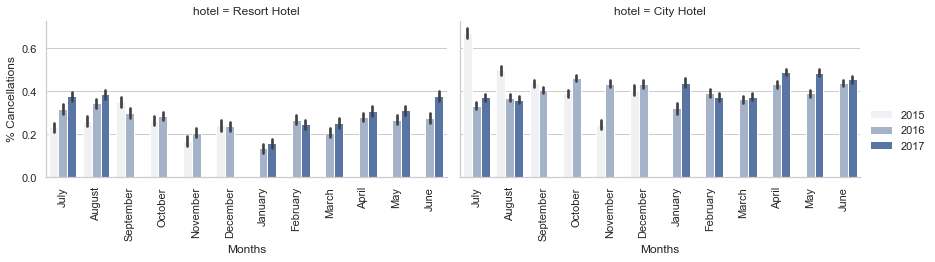

In [34]:
# plt.figure(figsize=[10,10])
# sns.color_palette(['r','g','b'],3)
# d = {'color': ['r', 'b','g']}
# g = sns.FacetGrid(df, row='Sex', col='Survived', hue_kws=d, hue='Survived')
# g.map(plt.hist, 'Age')

sns.set(style="whitegrid")
g = sns.FacetGrid(data=df, col="hotel" ,aspect=2, palette = 'colorblind')
g.map_dataframe(sns.barplot, x='arrival_date_month',y='is_canceled',hue='arrival_date_year')
g.add_legend()
g.set_xticklabels(rotation=90)
g.set_axis_labels('Months','% Cancellations')
# sns.barplot(data=df, x='arrival_date_year',y='is_canceled',hue='hotel',order='arrival_date_month')
plt.show()

- Jan month had very low cancellations for resorts. This makes sense as people tend to go on holidays. for City hotels the number of cancellations is almost the double of it
- Similar trend observed for November
- Overbooking of rooms by 20% for the whole year except for months November and January

## Analysis on Adults and Children

In [35]:
df[['stays_in_weekend_nights',
'stays_in_week_nights',
'adults',
'children',
'babies',
'meal']]

,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal
0,0,0,2,0.0,0,BB
1,0,0,2,0.0,0,BB
2,0,1,1,0.0,0,BB
3,0,1,1,0.0,0,BB
4,0,2,2,0.0,0,BB
...,...,...,...,...,...,...
119385,2,5,2,0.0,0,BB
119386,2,5,3,0.0,0,BB
119387,2,5,2,0.0,0,BB
119388,2,5,2,0.0,0,BB


In [36]:
df.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [37]:
df.loc[df.reservation_status=='No-Show', ['stays_in_weekend_nights',
'stays_in_week_nights',
'adults',
'children',
'babies',
'meal']]

,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal
122,0,1,1,0.0,0,BB
328,4,10,2,10.0,0,BB
343,2,3,2,0.0,0,BB
467,0,2,2,0.0,0,BB
472,0,2,1,0.0,0,BB
...,...,...,...,...,...,...
104650,0,0,1,0.0,0,BB
108459,2,0,1,0.0,0,BB
108829,2,1,1,0.0,0,BB
111925,1,0,1,0.0,0,BB


**Creating another Column that has Total Stay**

In [38]:
df['Total_Stay']=df.apply(lambda x: int(x['stays_in_weekend_nights']+x['stays_in_week_nights']),axis=1)

In [39]:
df[df.reservation_status !='Check-Out'].shape

(44224, 34)

In [40]:
# Check no of records where children>2 and reservation_status is not Check-Out

df[(df.children>2) &  (df.reservation_status !='Check-Out')].shape

(18, 34)

In [41]:
df.children.value_counts()

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [42]:
df.babies.value_counts()

0     118473
1        900
2         15
9          1
10         1
Name: babies, dtype: int64

In [43]:
df.adults.value_counts(normalize=True)

2     0.751152
1     0.192872
3     0.051947
0     0.003375
4     0.000519
26    0.000042
5     0.000017
20    0.000017
27    0.000017
6     0.000008
10    0.000008
40    0.000008
50    0.000008
55    0.000008
Name: adults, dtype: float64

In [44]:
df.loc[(df.adults==0),['hotel','adults','children','babies','reservation_status']]

,hotel,adults,children,babies,reservation_status
2224,Resort Hotel,0,0.0,0,Check-Out
2409,Resort Hotel,0,0.0,0,Check-Out
3181,Resort Hotel,0,0.0,0,Check-Out
3684,Resort Hotel,0,0.0,0,Check-Out
3708,Resort Hotel,0,0.0,0,Check-Out
...,...,...,...,...,...
117204,City Hotel,0,2.0,0,Check-Out
117274,City Hotel,0,2.0,0,Check-Out
117303,City Hotel,0,2.0,0,Check-Out
117453,City Hotel,0,2.0,0,Check-Out


**These looks to be errorneous records. Assiging a room to babies and children without adults does not seem to be correct**

In [45]:
df=df[~(df.adults==0)]

- People generally dont tend to book a room or travel with their children
- Very few people travel having kids >2
- Couples made the most of the bookings which accounts for 75%

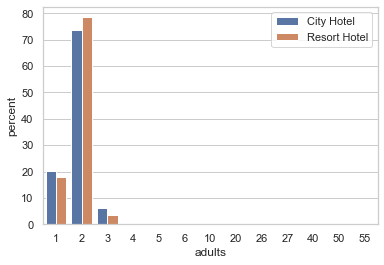

In [46]:
var=df.groupby('hotel')['adults'].value_counts(normalize=True).rename('percent').mul(100).reset_index()  
sns.barplot(data=var,x='adults', y='percent',hue='hotel')
plt.legend(bbox_to_anchor=(1,1), loc='upper right')
plt.show()

In [47]:
# Check how many customers travelled with both children and babies

df[(df.babies !=0) & (df.children !=0)].groupby('hotel')[['adults','is_canceled']].agg({'adults':'count', 
                                                                                      'is_canceled':'mean'
                                                                                     })

,adults,is_canceled
hotel,,
City Hotel,69,0.188406
Resort Hotel,103,0.194175


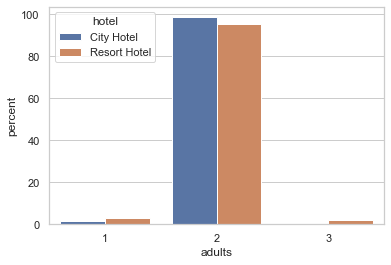

In [48]:
#with both children and babies

var=df[(df.babies !=0) & (df.children !=0)].groupby('hotel')['adults'].value_counts(normalize=True).rename('percent').mul(
    100).reset_index()  
sns.barplot(data=var,x='adults', y='percent',hue='hotel')
plt.show()

In [49]:
df[(df.babies !=0) | (df.children !=0)].groupby('hotel')[['adults','is_canceled']].agg({'adults':'count', 
                                                                                      'is_canceled':'mean'
                                                                                     })


,adults,is_canceled
hotel,,
City Hotel,5180,0.343243
Resort Hotel,3929,0.355561


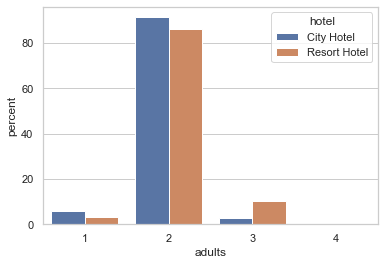

In [50]:
# with either children or babies

var=df[(df.babies !=0) | (df.children !=0)].groupby('hotel')['adults'].value_counts(normalize=True).rename('percent').mul(
    100).reset_index()  
sns.barplot(data=var,x='adults', y='percent',hue='hotel')
plt.show()

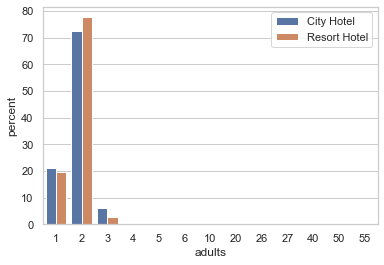

In [51]:
# without Children and babies

var=df[(df.babies ==0) & (df.children ==0)].groupby('hotel')['adults'].value_counts(normalize=True).rename('percent').mul(
    100).reset_index()  
sns.barplot(data=var,x='adults', y='percent',hue='hotel')
plt.legend(bbox_to_anchor=(1,1),loc='upper right')
plt.show()

**Analysis Result**
- Very few people travelled with children >2
- People generally dont tend to book a room or travel with their children
- Couples made the most of the bookings which accounts for 75% and prefer resorts over city hotels
- Singles tend to stay more in city hotels
- Adults with both children and babies tend to prefer resorts although not that significant
- Adults with either children or babies tend to prefer city hotels although not that significant
- Hotels can start creche facility to lure in more customers with babies/ children

## Meals and Stays

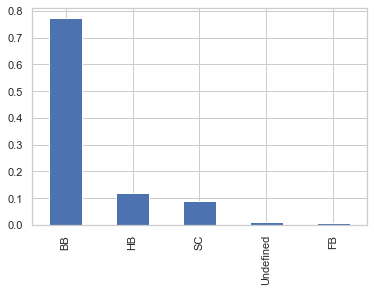

In [52]:
df.meal.value_counts(normalize=True).plot.bar()
plt.show()

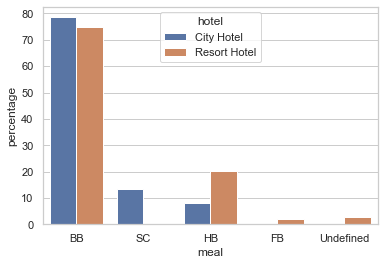

In [53]:
var=df.groupby('hotel')['meal'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
sns.barplot(x='meal',y='percentage',data=var,hue='hotel')
plt.show()

- The most preferred options is Bed and Breakfast for City hotel and resorts
- One thing to note is SC in Resort is almot non existent. While in city hotels it is the second most preferred option.
- Could be due to the fact that resorts are generally far away from cities.

### Stays with Meals

**Without Children and babies**

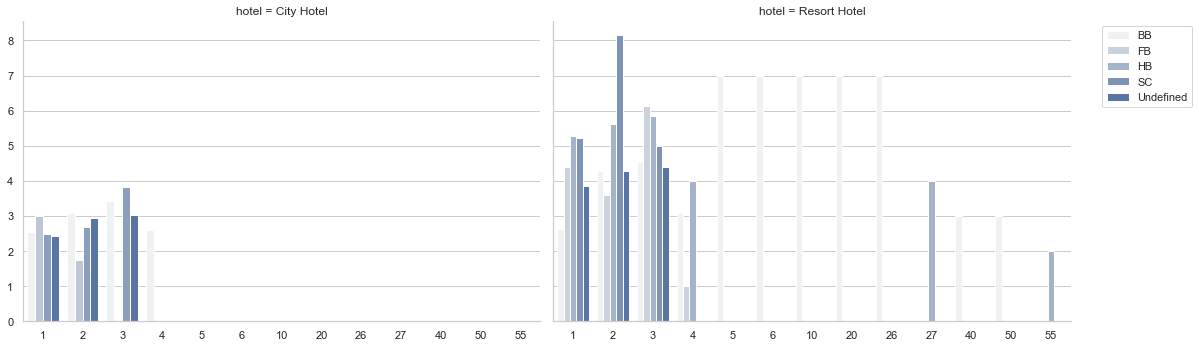

In [54]:
var=df[(df.babies ==0) & (df.children ==0)].groupby(by=['hotel','adults','meal'])['Total_Stay'].agg('mean').rename('Mean').reset_index()  

g=sns.FacetGrid(data=var,col='hotel', height=5, aspect=1.5, col_wrap=3)
g.map_dataframe(sns.barplot, x='adults', y='Mean',hue='meal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

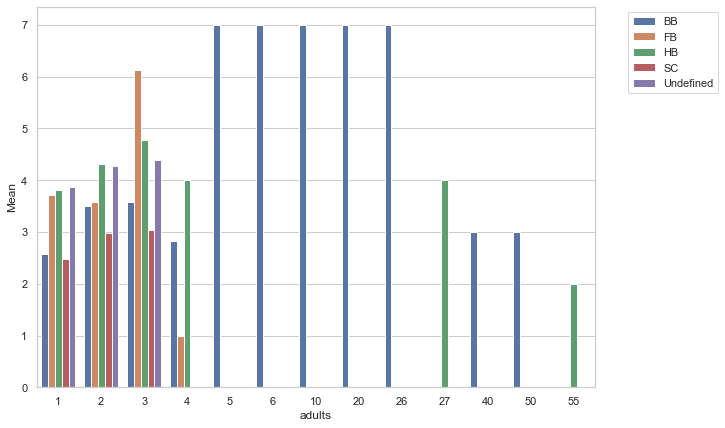

In [55]:

plt.figure(figsize=(10,7))
var=df[(df.babies ==0) & (df.children ==0)].groupby(by=['meal','adults'])['Total_Stay'].agg('mean').rename('Mean').reset_index()  
sns.barplot(data=var,x='adults', y='Mean',hue='meal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Without Kids**

**Resorts**:
- Stays in resorts is more than 3 days
- SC is the most preferred option for couples followed by FB with average stay of 8 days
- BB is most preferred by guests and they have average stay of a week
- Adults >2 also tend to stay longer for around 5 days.

**City Hotel**
- Average stay is less than 3 days
- No specific pattern with meal type and stay

**With either Children and babies or both**

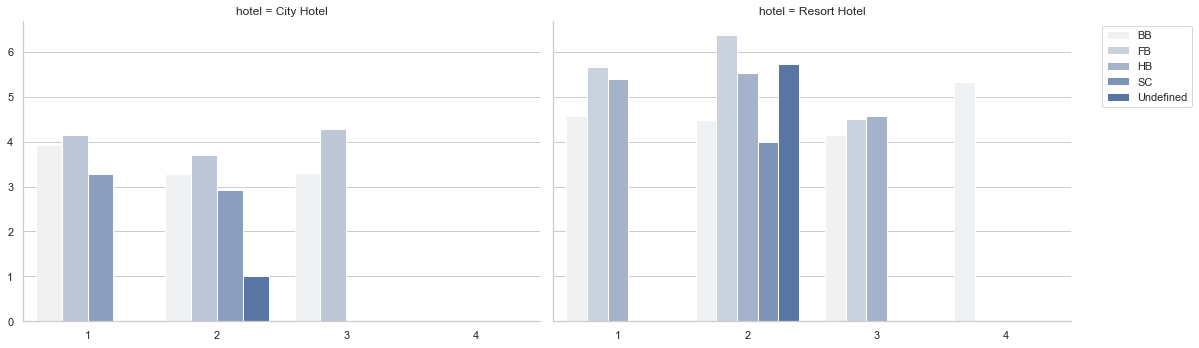

In [56]:
var=df[(df.babies !=0) | (df.children !=0)].groupby(by=['hotel','adults','meal'])['Total_Stay'].agg('mean').rename('Mean').reset_index()  

g=sns.FacetGrid(data=var,col='hotel', height=5, aspect=1.5, col_wrap=3)
g.map_dataframe(sns.barplot, x='adults', y='Mean',hue='meal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

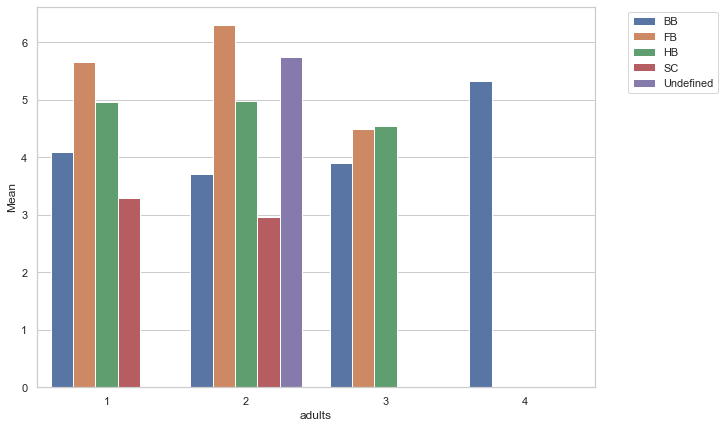

In [57]:

plt.figure(figsize=(10,7))
var=df[(df.babies !=0) | (df.children !=0)].groupby(by=['meal','adults'])['Total_Stay'].agg('mean').rename('Mean').reset_index()  
sns.barplot(data=var,x='adults', y='Mean',hue='meal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**With Kids**

**City Hotels**


### Stays

**Without Children and Babies**

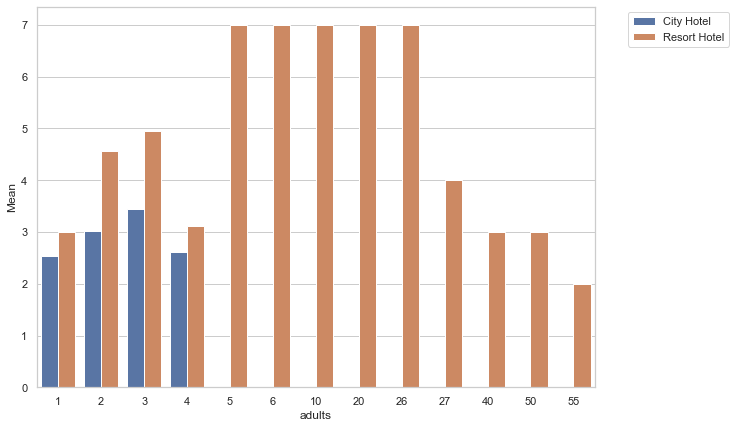

In [58]:
plt.figure(figsize=(10,7))
var=df[(df.babies ==0) & (df.children ==0)].groupby(by=['hotel','adults'])['Total_Stay'].agg('mean').rename('Mean').reset_index()  
sns.barplot(data=var,x='adults', y='Mean',hue='hotel')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**With Children and babies**

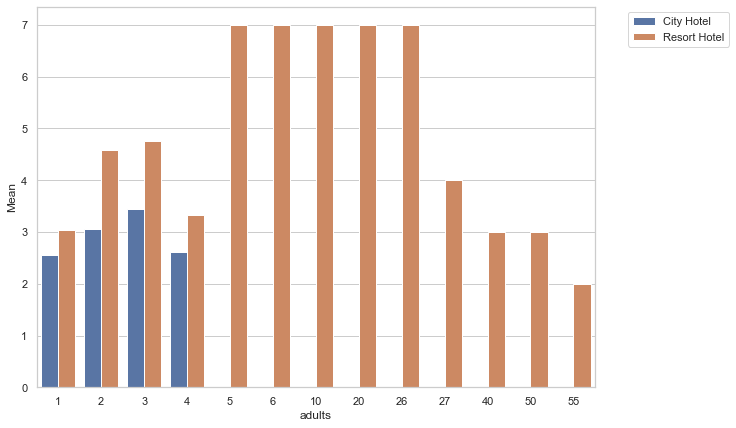

In [59]:
plt.figure(figsize=(10,7))
var=df.groupby(by=['hotel','adults'])['Total_Stay'].agg('mean').rename('Mean').reset_index()  
sns.barplot(data=var,x='adults', y='Mean',hue='hotel')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Analysis Result

- As we can see that most preferred options is Bed and Breakfast only
- One thing to note is SC in Resort is almot non existent. While in city hotels it is the second most preferred option. Could be due to the fact that resorts are generally far away from cities.
- BB category is predomimnantly taken by group booking but they tend to stay longer for nearly a week. The remaining SC category the stay is at the max to 3 days
- For longer stays Resorts are the preffered options
- Tour groups uses Resorts only for stays with BB as the preferred meal plan
- Tour groups dont travel with children or babies

**Without Kids**

*Resorts:*
- Stays in resorts is more than 3 days
- SC is the most preferred option for couples followed by FB with average stay of 8 days
- BB is most preferred by guests and they have average stay of a week
- Adults >2 also tend to stay longer for around 5 days with FB is most preferred option followed by HB

*City Hotel:*
- Average stay is less than 3 days
- No specific pattern with meal type and stay


**With Kids**

*Resorts:*
- FB and HB meals preferred by parents rather than couples without children or babies with average stay around 4 days. 
- Could be due to the fact from past experiences of staying in the resort it made more sense to have FB and HB meals

*City Hotels:*
- FB is most preferred with average stay of less than 4 days

## Country and market Segment

In [60]:
df.country.value_counts(normalize=True).head()

PRT    0.407103
GBR    0.101734
FRA    0.087203
ESP    0.071823
DEU    0.061108
Name: country, dtype: float64

In [61]:
df.market_segment.value_counts(normalize=True)

Online TA        0.472497
Offline TA/TO    0.203207
Groups           0.166329
Direct           0.105499
Corporate        0.044391
Complementary    0.006085
Aviation         0.001975
Undefined        0.000017
Name: market_segment, dtype: float64

In [62]:

df.loc[(df['country'].isin(['PRT','GBR','FRA','ESP','DEU'])),
       ['market_segment','country']].groupby('country')['market_segment'].value_counts(normalize=True)


country  market_segment
DEU      Online TA         0.546417
         Offline TA/TO     0.306010
         Groups            0.081694
         Direct            0.057076
         Corporate         0.006877
         Aviation          0.001100
         Complementary     0.000825
ESP      Online TA         0.626726
         Groups            0.124386
         Direct            0.121928
         Offline TA/TO     0.106132
         Corporate         0.017903
         Aviation          0.001521
         Complementary     0.001404
FRA      Online TA         0.609676
         Offline TA/TO     0.215401
         Direct            0.097436
         Groups            0.058115
         Corporate         0.018022
         Aviation          0.001060
         Complementary     0.000289
GBR      Online TA         0.537299
         Offline TA/TO     0.253119
         Groups            0.124742
         Direct            0.072449
         Corporate         0.010409
         Complementary     0.001652
    

Top 5 countries preferred booking choices

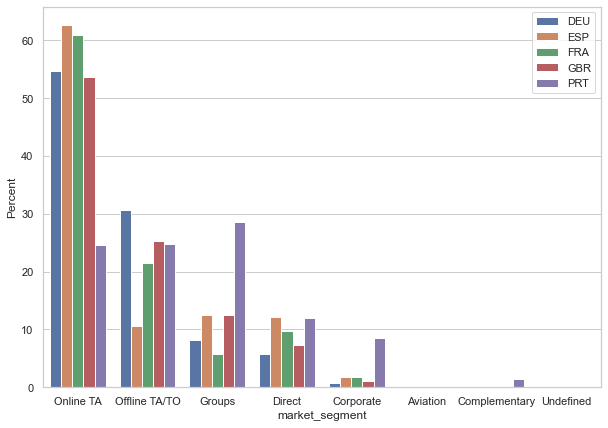

In [63]:
plt.figure(figsize=[10,7])
var=df.loc[(df['country'].isin(
    df.country.value_counts(normalize=True).head().index)),
       ['market_segment','country']].groupby('country')['market_segment'].value_counts(normalize=True).rename('Percent').mul(
    100).reset_index()

# nation=['PRT','GBR','FRA','ESP','DEU']
# sns.displot(x=df.market_segment, kde=True, norm_hist=True)
sns.barplot(data=var,x='market_segment',y='Percent',hue='country')
plt.legend(bbox_to_anchor=(1,1),loc='upper right')
# plt.xticks(rotation=90)
plt.show()

### Analysis Result

- Portugal is the country with maximum tourist
- Online TA is the most preferred choice with bookings above 50% except for Portugal
- For Portugal there is no one preffered choice like others


## ADR and Room Type

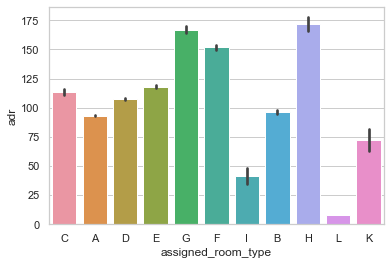

In [64]:
#Which roomtype had most ADR across hotels
sns.barplot(x=df.assigned_room_type, y=df.adr)
plt.show()

Room G, F and H are the ones with most ADR

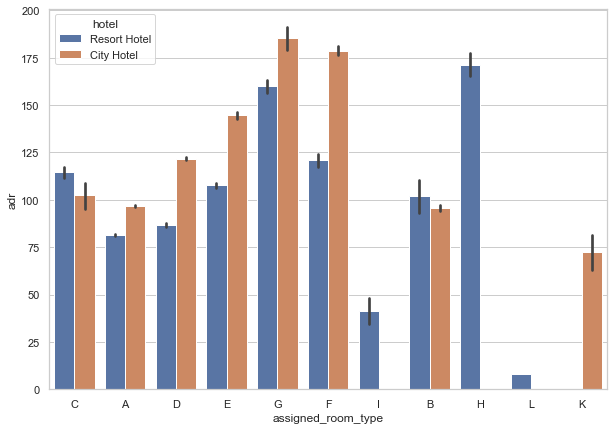

In [65]:
# Which Room type has max ADR and in which hotel

plt.figure(figsize=(10,7))
sns.barplot(data=df,x='assigned_room_type',y='adr',hue='hotel')
plt.show()

Rooms G, F and E have maximum ADR in City Hotels. 

Room H has maximum ADR in Resorts followed by G and F with the most ADR

#### ADR with Meal Type

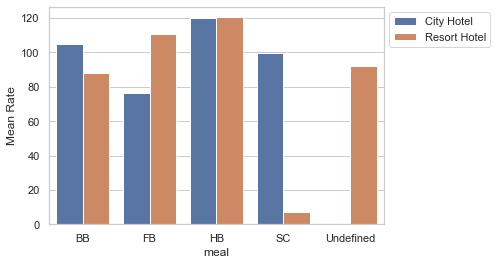

In [66]:
var=df.groupby(by=['hotel','meal'])['adr'].mean().rename('Mean Rate').reset_index()

sns.barplot(data=var,x='meal',y='Mean Rate',hue='hotel')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

- HB and BB is the most preferred choice for City hotels
- For Resorts, HB is closely followed by FB

#### Room Type and Kids

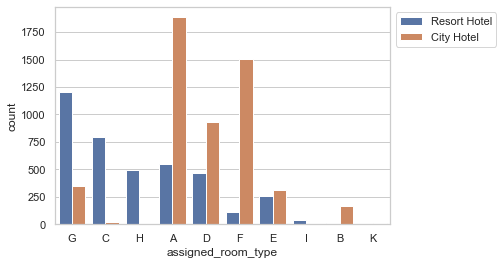

In [67]:
# Which Room had the most children or babies per hotel
sns.countplot(data=df[(df['children']!=0) | (df['babies']!=0)], x='assigned_room_type',hue='hotel')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

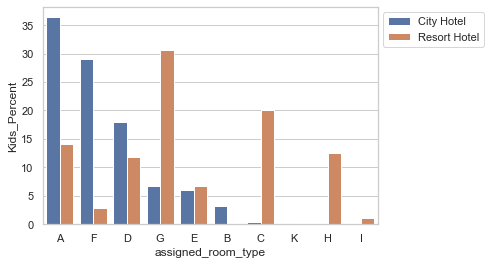

In [68]:


var=df[(df['children']!=0) |  (df['babies']!=0) ].groupby(by=['hotel'])['assigned_room_type'].value_counts(
    normalize=True).rename('Kids_Percent').mul(100).reset_index()


sns.barplot(data=var, x='assigned_room_type',y='Kids_Percent', hue='hotel')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

- For City Hotel, room A, F and D had the most children or babies
- For Resorts, Room G was the most preferred by people with babies or children. This was followed by room C and then room H

#### Meal Type and ADR

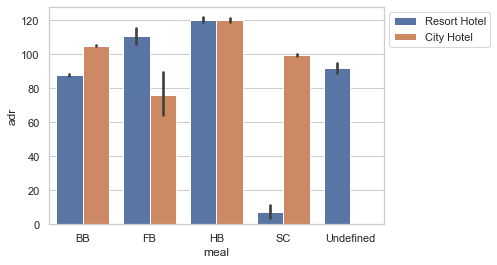

In [69]:
sns.barplot(data=df, x='meal',y='adr', hue='hotel')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

#### ADR, Room Type and Kids

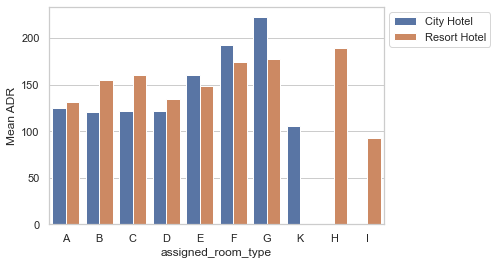

In [70]:
# Which Room type has max ADR and in which hotel that hosted Children or babies

var=df[(df['children']!=0) | (df['babies']!=0)].groupby(by=['hotel','assigned_room_type'])['adr'].mean().rename('Mean ADR').reset_index()


sns.barplot(data=var, x='assigned_room_type',y='Mean ADR', hue='hotel')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

**Rooms that hosted Children or babies with most ADR is as follows:**
- City Hotels: Room G, followed by F and E
- Resorts: Room H followed by room G and F

***There seems to be a relation between ADR, Assigned room Type and Children***

In [71]:
res=pd.pivot_table(data=df[(df['children']!=0)], index='assigned_room_type', columns='children', values='adr').fillna(0)
# sns.heatmap(res.corr(), annot=True, cmap='RdYlGn')

res

children,1.0,2.0,3.0,10.0
assigned_room_type,,,,
A,129.604864,123.032600,0.000000,0.00
B,120.438750,135.953636,116.130000,0.00
C,141.011260,175.092414,201.700000,0.00
D,129.173576,133.689535,0.000000,133.16
E,155.234164,173.967887,215.000000,0.00
F,177.335731,194.207387,234.625000,0.00
G,174.169114,189.113615,245.820652,0.00
H,192.360840,180.055909,159.933000,0.00
I,89.160909,95.825000,0.000000,0.00


<AxesSubplot:xlabel='children', ylabel='assigned_room_type'>

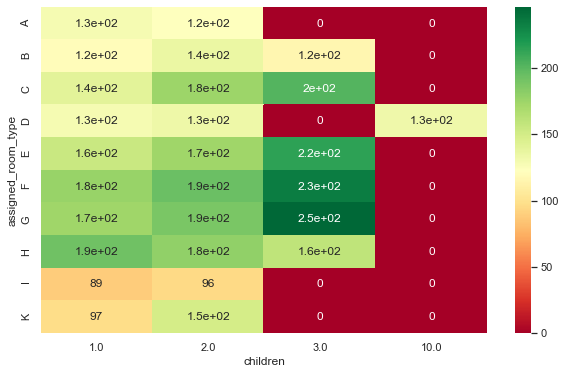

In [72]:
plt.figure(figsize=(10,6))
sns.heatmap(res, annot=True, cmap='RdYlGn')

With 3 Children Room type G F and E had max ADR.
With 2 Children Room Type G and F had max ADR.
With 1 Children Room type H had max ADR

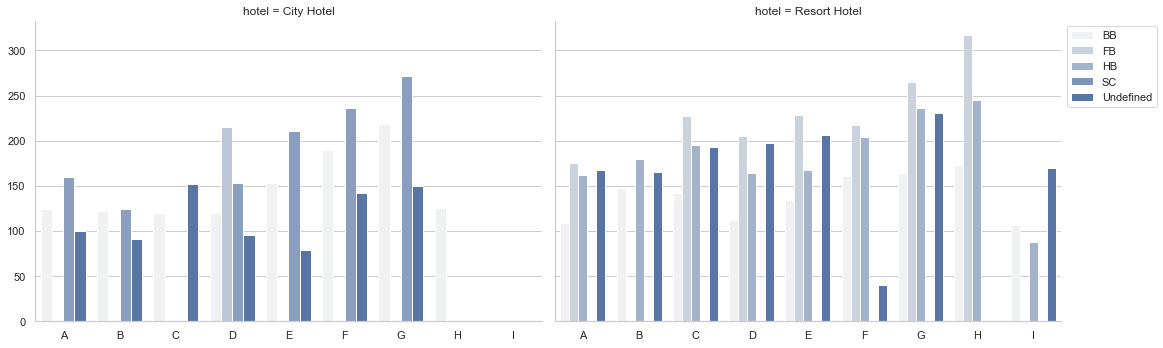

In [73]:
# Average ADR with Children across hotels with kind of meal opted and room type
var=df[(df['children']!=0) | (df['babies']!=0)].groupby(by=['hotel','meal','assigned_room_type'])['adr'].mean().rename('Mean ADR').reset_index()

g= sns.FacetGrid(data=var, col='hotel',height=5, aspect = 1.5)
g.map_dataframe(sns.barplot, x='assigned_room_type',y='Mean ADR', hue='meal')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

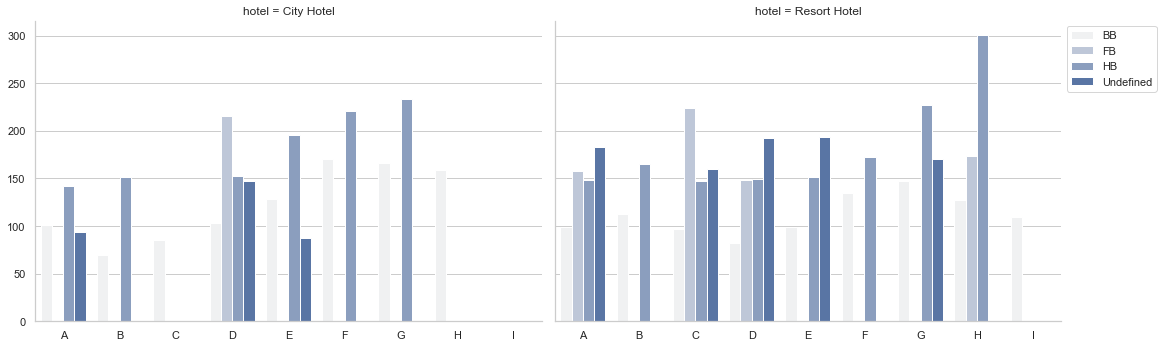

In [74]:
var=df[df['babies']!=0].groupby(by=['hotel','meal','assigned_room_type'])['adr'].mean().rename('Mean ADR').reset_index()

g= sns.FacetGrid(data=var, col='hotel',height=5, aspect = 1.5)
g.map_dataframe(sns.barplot, x='assigned_room_type',y='Mean ADR', hue='meal')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

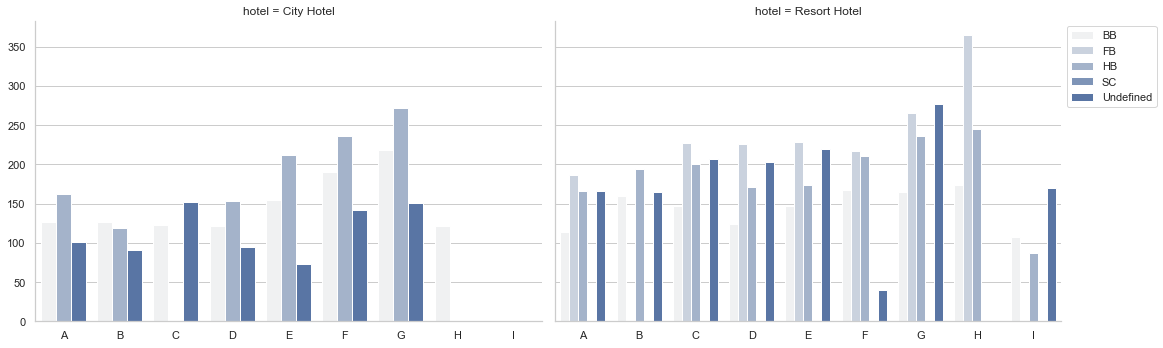

In [75]:
var=df[df['children']!=0].groupby(by=['hotel','meal','assigned_room_type'])['adr'].mean().rename('Mean ADR').reset_index()

g= sns.FacetGrid(data=var, col='hotel',height=5, aspect = 1.5)
g.map_dataframe(sns.barplot, x='assigned_room_type',y='Mean ADR', hue='meal')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

<AxesSubplot:xlabel='children', ylabel='adr'>

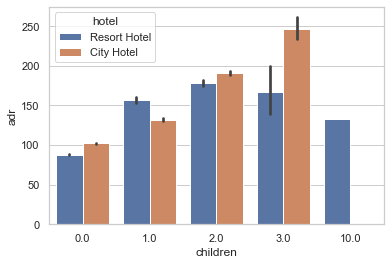

In [76]:
sns.barplot(data=df, x='children',y='adr', hue='hotel')

<AxesSubplot:xlabel='babies', ylabel='adr'>

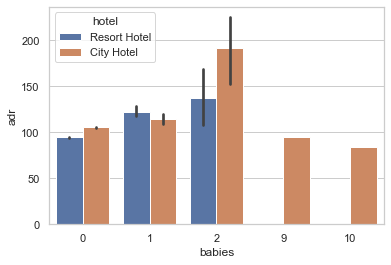

In [77]:
sns.barplot(data=df, x='babies',y='adr', hue='hotel')

### Analysis Result

**Highest ADR**
- Room G, F and H are the ones with most ADR
- Rooms G, F and E have maximum ADR in **City Hotels**.
- Room H has maximum ADR in **Resorts** followed by G and F with the most ADR

**Rooms with most Kids**
- For City Hotel, room A, F and D had the most children or babies
- For Resorts, Room G was the most preferred by people with babies or children. This was followed by room C and then room H

**Meal Type and ADR**
- HB and BB is the most preferred choice for City hotels with maximum ADR
- For Resorts, HB is closely followed by FB with most ADR
- For SC category in resorts, that was predominantly the group bookings as seen earlier, the Average Daily Rate is nominal. This may be due to they have tour operating may have the meals are already adjusted within the tour package
- HB has the maximum ADR.
- For City Hotels, while booking we can ask the customers to opt for FB instead of HB as it may bring more value to customer


**Rooms that hosted Children or babies with *most ADR* and meal Type is as follows:**
***City Hotels:***
- Room G, followed by F and E in term of max ADR
- HB has max ADR in terms of meal type opted in Room type F and G
- FB has mx ADR for Room D that has highed ADR
- With Babies, FB is with max ADR in room type D, while HB has max ADR with Room type G, F and E in the same order
- With Children, FB and HB had same pattern in max ADR with Room Type G, F and E in same order

***Resorts***
- Room H followed by room G and F with max ADR
- Travellers in Room G  are the one that also opted for HB meals
- Room H had the most ADR with FB followed by room G, C and E
- Room type C has the most FB with max ADR
- With Babies, Room H had maximum ADR with HB
- With Babies, Room D had max ADR with FB
- With Children, Room H had maximum ADR with FB and HB. 
- With Children, Room G has the second max ADR with both FB and HB


# Car Parking

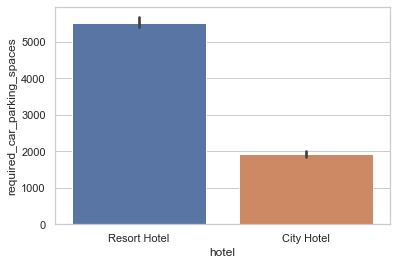

In [78]:
sns.barplot(data=df,x='hotel', y='required_car_parking_spaces', estimator=sum)
plt.show()

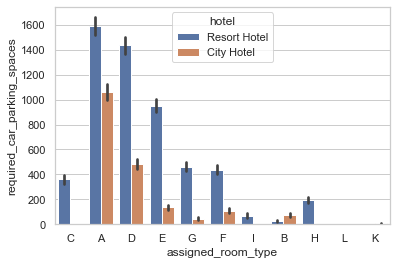

In [79]:
sns.barplot(data=df,x='assigned_room_type', y='required_car_parking_spaces',hue='hotel', estimator=sum)
plt.show()

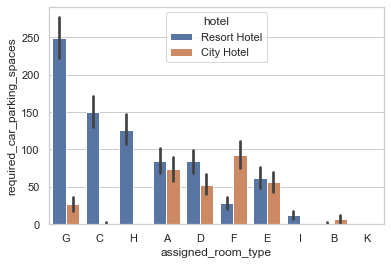

In [80]:
sns.barplot(data=df[(df['children']!=0) | (df['babies']!=0)],x='assigned_room_type', y='required_car_parking_spaces',hue='hotel', estimator=sum)
plt.show()

### Analysis Result

- Car parking on resorts is almost 3 times than city hotels
- Overall Room A and D has the maximum requirement of car parkings for resorts, while for city hotels room type A has max requirement
- When further analyzing with babies or children we see that for city hotels the max requirement is with room type F (insignificant though). For Resorts, Rooms types G and C has the maximum need